In [1]:
from sklearn import svm
from sklearn.model_selection import ShuffleSplit
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle 
import statistics as stats
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [2]:
# read data from csv file and put into one matrix 
# same process of v1
def readData(filename,x1):
    f = open("data/"+filename,'r')
    for row in f:
        data = [int(p) for p in row.split(',')]
        x1.append(np.array(data))
    return 

x = []
readData("getOutBed.csv",x)
readData("getOnBed.csv",x)
readData("layOnBed.csv",x)
readData("sitOnBed.csv",x)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [4]:
from scipy.signal import find_peaks

x_peak = []
for r in x:
    peaks, _ = find_peaks(r,distance=100)
    x_peak.append(np.array([r[i] for i in peaks]))
x_peak = np.array(x_peak)




# peaks, _ = find_peaks(d1,distance=100)
print(len(x_peak))
print x_peak.shape
# dx = [d1[i] for i in peaks]
# plt.figure(figsize=(20,10))
# # plt.plot(peaks, dx,"x")
# plt.plot(dx,'b-')
# plt.plot(dx,'r.')
# # plt.plot(d1)
# # plt.plot(d1,color="gray
# plt.show()
# print len(dx)

480
(480,)


In [5]:
x_peak_revised = []
# temp1 = [stats.mean(s1), stats.median(s1), stats.variance(s1), max(s1), min(s1)]
for r in x_peak:
    period = len(r)/3 
    p1 = r[:period]
    p2 = r[period:period*2]
    p3 = r[period*2:]
    p1_s = [stats.mean(p1), stats.median(p1), stats.variance(p1), max(p1), min(p1)]
    p2_s = [stats.mean(p2), stats.median(p2), stats.variance(p2), max(p2), min(p2)]
    p3_s = [stats.mean(p3), stats.median(p3), stats.variance(p3), max(p3), min(p3)]
    
    
    
    new_r = p1_s + p2_s + p3_s
    x_peak_revised.append(np.array(new_r))
x_peak_revised = np.array(x_peak_revised)
print x_peak_revised.shape

(480, 15)


In [6]:
y = np.array([0]*120+[1]*120+[2]*120+[3]*120)

In [7]:
# shuffle X and Y correspondingly 
X, Y = shuffle(x_peak_revised, y, random_state = 34)
offset = int(len(X)*0.8)
X_train, Y_train = X[:offset], Y[:offset]
X_test, Y_test = X[offset:], Y[offset:]
print (type(X_train), type(Y_train))
print (len(X_train), len(X_train[0]), len(Y_train), len(X_test), len(X_test[0]), len(Y_test))

(<type 'numpy.ndarray'>, <type 'numpy.ndarray'>)
(384, 15, 384, 96, 15, 96)


In [8]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

clf = svm.SVC(gamma='scale',max_iter=5000, verbose=True)
y_pred = clf.fit(X_train, Y_train).predict(X_test)
print y_pred

correct = 0
for i in xrange(len(y_pred)):
    if y_pred[i] == Y_test[i]:
        correct+=1
print (correct/float(len(Y_test)))

[LibSVM][3 1 3 1 1 2 1 0 0 2 1 1 0 0 0 1 3 3 0 0 2 2 3 1 2 1 0 3 0 2 1 3 3 1 1 2 3
 2 1 1 0 2 0 3 0 3 3 2 1 1 1 0 3 3 0 3 1 1 2 1 1 0 0 3 3 3 0 0 1 3 0 3 3 2
 3 0 3 0 3 2 2 3 0 0 0 1 0 1 3 0 2 1 2 2 1 3]
0.71875


In [9]:
result2 = clf.predict(X_train)
correct2 = 0
for i in xrange(len(result2)):
    if result2[i] == Y_train[i]:
        correct2+=1
print "Train: ",(correct2/float(len(Y_train)))

Train:  0.755208333333


Confusion matrix, without normalization
[[20  4  2  1]
 [ 4 22  1  0]
 [ 1  0 11 10]
 [ 1  0  3 16]]
Normalized confusion matrix
[[0.74 0.15 0.07 0.04]
 [0.15 0.81 0.04 0.  ]
 [0.05 0.   0.5  0.45]
 [0.05 0.   0.15 0.8 ]]


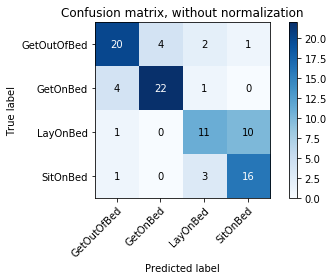

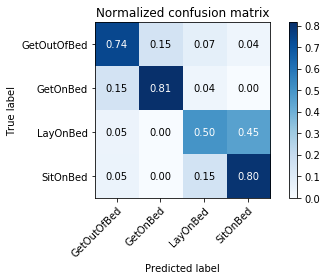

In [10]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(Y_test, y_pred, np.array(['GetOutOfBed','GetOnBed','LayOnBed','SitOnBed']),
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(Y_test, y_pred, np.array(['GetOutOfBed','GetOnBed','LayOnBed','SitOnBed']), normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [11]:
clf_nb = GaussianNB()
clf_nb.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [12]:
results_nb = clf_nb.predict(X_test)
print results_nb
correct = 0
for i in xrange(len(results_nb)):
    if results_nb[i] == Y_test[i]:
        correct+=1
print (correct/float(len(Y_test)))

[3 1 3 1 1 2 1 0 0 2 1 1 0 2 0 1 3 3 0 0 3 2 2 1 2 1 2 3 2 2 1 3 3 1 0 2 3
 2 1 1 2 3 0 3 1 3 3 2 1 1 1 0 3 3 0 3 1 1 2 1 1 0 0 3 3 3 0 0 1 3 0 3 3 2
 3 0 3 0 3 2 2 3 0 2 0 1 0 1 3 0 2 1 2 2 1 3]
0.729166666667


In [13]:
c_nb2 = 0
results_nb2 = clf_nb.predict(X_train)
for i in xrange(len(results_nb2)):
    if results_nb2[i] == Y_train[i]:
        c_nb2 += 1
print "Train: ",(c_nb2/float(len(Y_train)))

Train:  0.75


Confusion matrix, without normalization
[[18  3  5  1]
 [ 3 23  1  0]
 [ 0  0 12 10]
 [ 0  0  3 17]]
Normalized confusion matrix
[[0.67 0.11 0.19 0.04]
 [0.11 0.85 0.04 0.  ]
 [0.   0.   0.55 0.45]
 [0.   0.   0.15 0.85]]


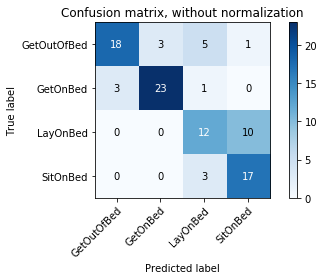

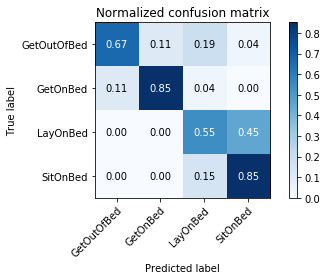

In [14]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(Y_test, results_nb, np.array(['GetOutOfBed','GetOnBed','LayOnBed','SitOnBed']),
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(Y_test, results_nb, np.array(['GetOutOfBed','GetOnBed','LayOnBed','SitOnBed']), normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [15]:
clf_gbc = GradientBoostingClassifier(n_estimators=500, learning_rate=1.0,max_depth=3, random_state=0, verbose = True).fit(X_train, Y_train)

      Iter       Train Loss   Remaining Time 
         1         183.9324            2.35s
         2         101.8833            2.29s
         3          68.9466            2.23s
         4          50.0118            2.21s
         5          35.5691            2.20s
         6          26.8944            2.21s
         7          19.6074            2.22s
         8          15.1922            2.22s
         9          12.4108            2.22s
        10           9.8892            2.20s
        20           1.6914            1.95s
        30           0.3259            1.70s
        40           0.1026            1.47s
        50           0.0849            1.26s
        60           0.0849            1.10s
        70           0.0849            0.99s
        80           0.0849            0.90s
        90           0.0849            0.83s
       100           0.0849            0.77s
       200           0.0849            0.47s
       300           0.0849            0.28s
       40

In [16]:
results_gbc = clf_gbc.predict(X_test)

Confusion matrix, without normalization
[[21  3  1  2]
 [ 0 26  1  0]
 [ 0  0 14  8]
 [ 1  0  5 14]]
Normalized confusion matrix
[[0.78 0.11 0.04 0.07]
 [0.   0.96 0.04 0.  ]
 [0.   0.   0.64 0.36]
 [0.05 0.   0.25 0.7 ]]


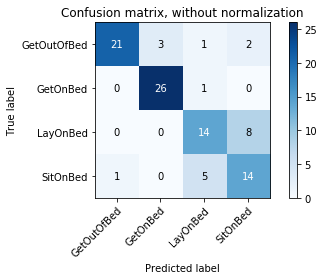

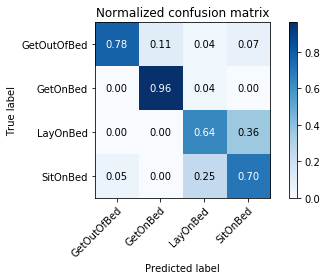

In [17]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(Y_test, results_gbc, np.array(['GetOutOfBed','GetOnBed','LayOnBed','SitOnBed']),
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(Y_test, results_gbc, np.array(['GetOutOfBed','GetOnBed','LayOnBed','SitOnBed']), normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [18]:
clf_gbc.score(X_test,Y_test)

0.78125

In [19]:
clf_gbc.score(X_train,Y_train)

1.0